<a href="https://colab.research.google.com/github/valkebets/kickstarter_success/blob/main/ks_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration

In [ ]:
# Import libraries

import os
import numpy as np
import pandas as pd
import chardet

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Mount google drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset

file = '/content/drive/MyDrive/kickstarter/ks_dataset.csv'

with open(file, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

data = pd.read_csv(file, encoding=result['encoding'])
data.head()

<ipython-input-2-0a09ac03ae14>:8: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, encoding=result['encoding'])


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [ ]:
# Create copy of dataframe to work on
df = data.copy()
print(df.columns)

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')


In [ ]:
# House cleaning
# Remove spaces in column names
df.columns = df.columns.str.replace(' ', '')
print(df.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')


In [ ]:
# Check unique values in each column (look for obvious errors)
for col in df:
  print(df[col].name)
  print(df[col].unique())

ID
[1000002330 1000004038 1000007540 ...  999986353  999987933  999988282]
name
['The Songs of Adelaide & Abullah' 'Where is Hank?'
 'ToshiCapital Rekordz Needs Help to Complete Album' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']
category
['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 'Accessories' 'Rock' 'Hardware' 'Weaving' 'Gadgets' 'Web' 'Jazz'
 'Ready-to-wear' 'Festivals' 'Video Games' 'Anthologies' 'Publishing'
 'Shorts' 'Electronic Music' 'Radio & Podcasts' 'Apps' 'Cookbooks'
 'Apparel' 'Metal' 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting'
 'Software' 'World Music' 'Photobooks' '

In [ ]:
# Check rows with errors (too many columns)
df2 = df.copy()
df2 = df2.dropna(subset = ['Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'], how='all') # remove rows that have nans in the last 4 columns
print(df2.columns)
df2.head()

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usdpledged', 'Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'],
      dtype='object')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,Unnamed:13,Unnamed:14,Unnamed:15,Unnamed:16
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,NaN
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,NaN
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,NaN
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,NaN
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,NaN


In [ ]:
# Check how many rows have extra columns (mishaped/shifted data) to decide whether to keep them
print(df2.shape[0], '(', df2.shape[0] / df.shape[0] * 100, '%) rows have too many columns')

625 ( 0.19305019305019305 %) rows have too many columns


Since less than 1% data are mishaped, we're just going to remove these rows

In [ ]:
# Prepare dataframe with rows without any extra columns

df3 = df.copy()
df3 = df3[df3['Unnamed:13'].isnull()] 

# Remove 4 last columns
df3 = df3.drop(['Unnamed:13', 'Unnamed:14', 'Unnamed:15', 'Unnamed:16'], axis=1)

print('Table dimensions after removing mishaped rows = ', df3.shape[0])
df3.head()

Table dimensions after removing mishaped rows =  323125


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [ ]:
# Check unique values in each column again to check for other errors
for col in df3:
  print(df3[col].name)
  print(df3[col].unique())

ID
[1000002330 1000004038 1000007540 ...  999986353  999987933  999988282]
name
['The Songs of Adelaide & Abullah' 'Where is Hank?'
 'ToshiCapital Rekordz Needs Help to Complete Album' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']
category
['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 'Accessories' 'Rock' 'Hardware' 'Weaving' 'Gadgets' 'Web' 'Jazz'
 'Ready-to-wear' 'Festivals' 'Video Games' 'Anthologies' 'Publishing'
 'Shorts' 'Electronic Music' 'Radio & Podcasts' 'Apps' 'Cookbooks'
 'Apparel' 'Metal' 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting'
 'Software' 'World Music' 'Photobooks' '

It seems there are more rows that are shifted/mishaped, let's see how many rows are affected

In [ ]:
df4 = df3.loc[(df3['currency'] == 'Music') | (df3['currency'] == 'Film & Video')]

# Check how many rows have extra columns (mishaped/shifted data) to decide whether to keep them
print(df4.shape[0], '(', df4.shape[0] / df.shape[0] * 100, '%) rows have too many columns')

7 ( 0.002162162162162162 %) rows have too many columns


Let's remove them since it's only 7 rows

In [ ]:
# Remove rows where wrong currency

df5 = df3.loc[(df3['currency'] != 'Music') & (df3['currency'] != 'Film & Video')]
df5

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323745,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
323746,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
323747,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
323748,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200


In [ ]:
# Check unique values in each column to check for more errors
for col in df5:
  print(df5[col].name)
  print(df5[col].unique())

ID
[1000002330 1000004038 1000007540 ...  999986353  999987933  999988282]
name
['The Songs of Adelaide & Abullah' 'Where is Hank?'
 'ToshiCapital Rekordz Needs Help to Complete Album' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']
category
['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Design' 'Comic Books' 'Art Books' 'Fashion' 'Theater'
 'Comics' 'DIY' 'Webseries' 'Food Trucks' 'Public Art' 'Illustration'
 'Photography' 'Pop' 'Tabletop Games' 'Art' 'Family' 'Fiction'
 'Accessories' 'Rock' 'Hardware' 'Weaving' 'Gadgets' 'Web' 'Jazz'
 'Ready-to-wear' 'Festivals' 'Video Games' 'Anthologies' 'Publishing'
 'Shorts' 'Electronic Music' 'Radio & Podcasts' 'Apps' 'Cookbooks'
 'Apparel' 'Metal' 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting'
 'Software' 'World Music' 'Photobooks' '

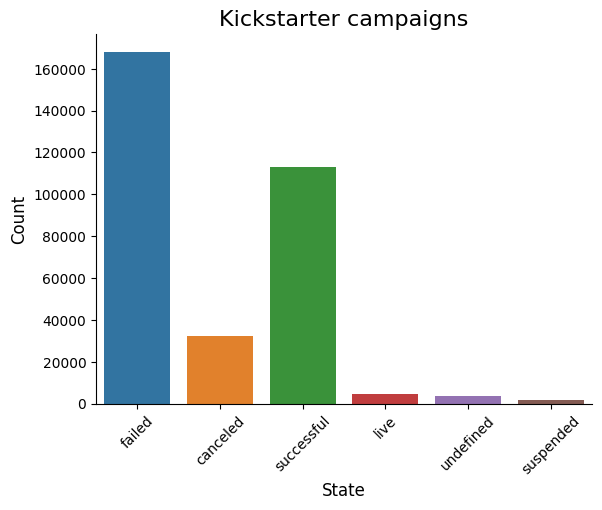

In [ ]:
# Let's plot the target (state)

sns.countplot(data=df5, x='state')
plt.title('Kickstarter campaigns', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('State', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Let's keep only campaigns that have failed or succeeded

In [ ]:
df6 = df5[(df5['state'] == 'failed') | (df5['state'] == 'successful')]
print(df6['state'].unique()) # check
print('Dimensions dataset :', df6.shape[0])
df6.head()

['failed' 'successful']
Dimensions dataset : 281302


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205


In [ ]:
# Compute campaign duration (deadline-launch)
#df6['deadline'] = pd.to_datetime(df6['deadline'])
#df6['launched'] = pd.to_datetime(df6['launched'])
#df6['duration'] = (df6['deadline'] - df6['launched']).dt.days # Create new column with duration
pd.to_datetime(df6['deadline'])
pd.to_datetime(df6['launched'])
df6['duration'] = (df6['deadline'] - df6['launched']).dt.days # Create new column with duration

df6.head()

<ipython-input-34-16ac65c64044>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['duration'] = (df6['deadline'] - df6['launched']).dt.days # Create new column with duration


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usdpledged,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,30
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,35
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,20


Plot features

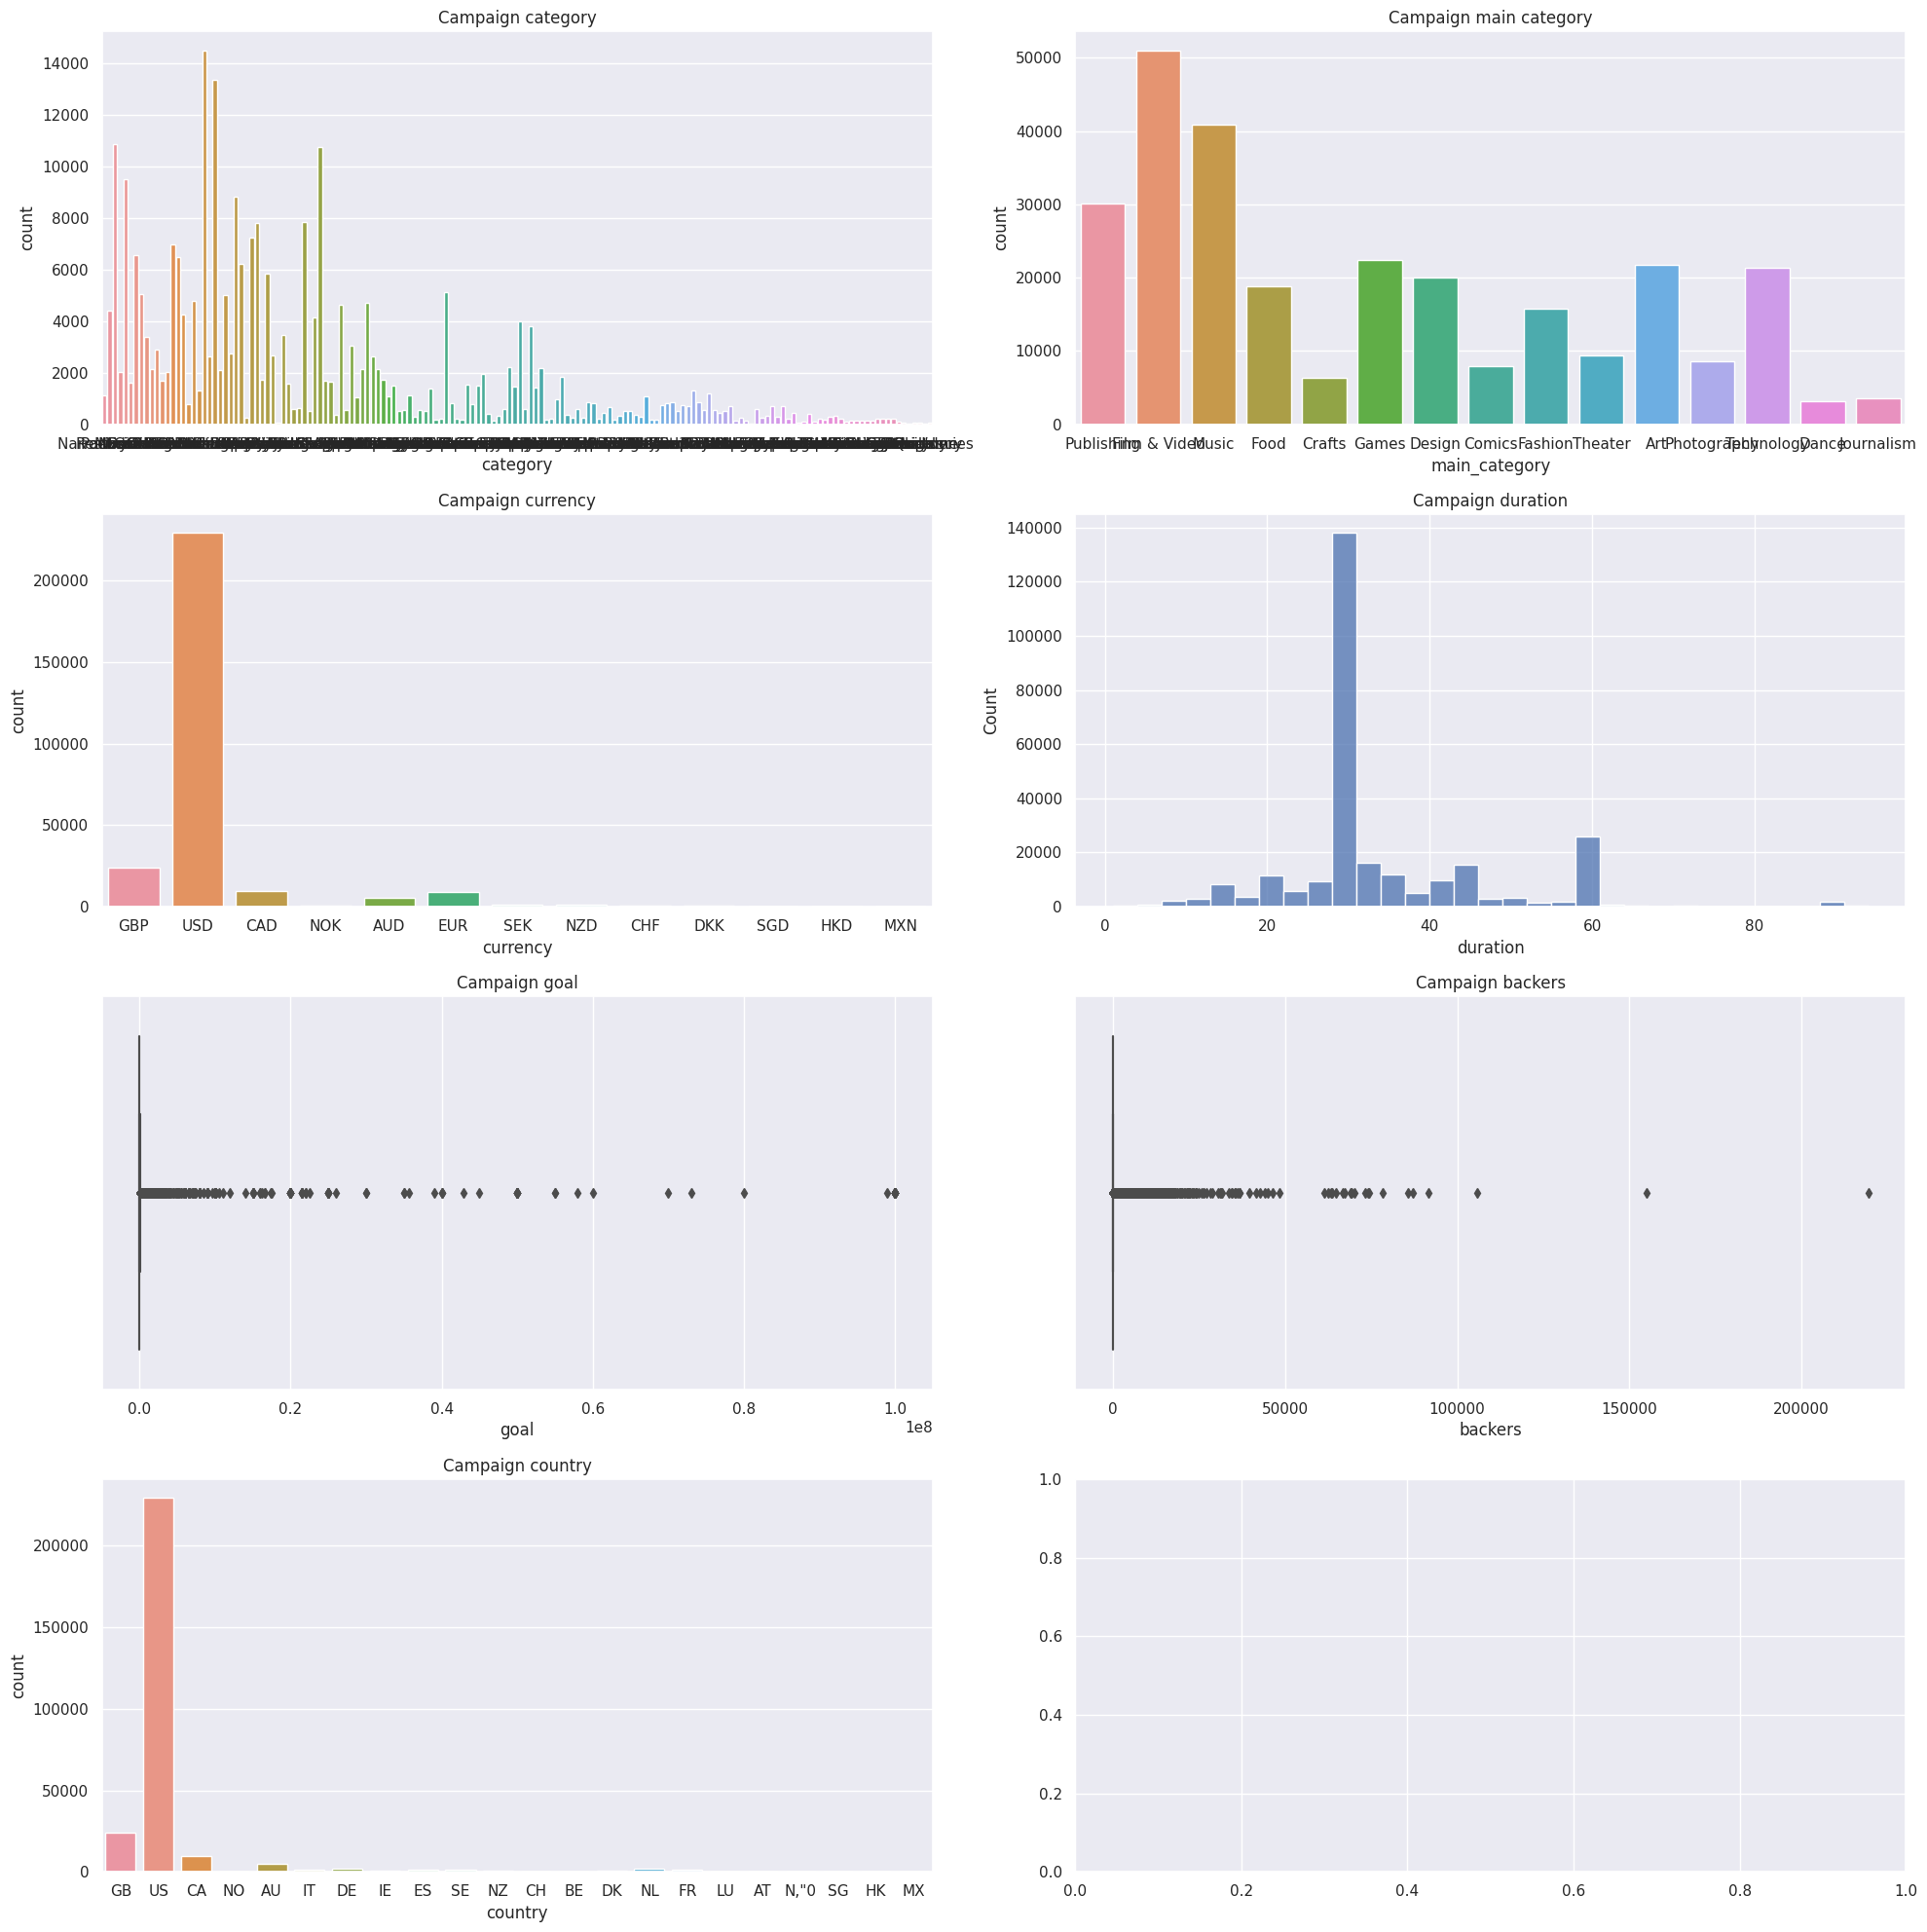

In [ ]:
# Have subplot for each feature

import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#plt.figure(figsize=(50,100)) 
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
#fig, axes = plt.subplots(4, 2)

# 1. Category
sns.countplot(data=df6, x='category', ax=axes[0,0]).set(title='Campaign category')

# 2. Main category
sns.countplot(data=df6, x='main_category', ax=axes[0,1]).set(title='Campaign main category')

# 3. Currency
sns.countplot(data=df6, x='currency', ax=axes[1,0]).set(title='Campaign currency')

# 4. Duration
sns.histplot(data=df6, x='duration', binwidth=3, ax=axes[1,1]).set(title='Campaign duration')

# 5. Goal
sns.boxplot(x=pd.to_numeric(df6['goal']), ax=axes[2,0]).set(title='Campaign goal')

# 6. Backers
sns.boxplot(x=pd.to_numeric(df6['backers']), ax=axes[2,1]).set(title='Campaign backers')

# 7. Country
sns.countplot(data=df6, x='country', ax=axes[3,0]).set(title='Campaign country')

plt.tight_layout()
plt.show()

We'll remove category because they would need further sorting. We'll also remove currency since it's likely to be redundant with country.

In [ ]:
# Select features of interest
df_final = df6[['main_category','goal','duration','country','backers','state']]

# Convert to numeric values
cols = ['goal','backers']
df_final[cols] = df_final[cols].apply(pd.to_numeric, errors='coerce')

df_final

<ipython-input-53-f79f065826d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[cols] = df_final[cols].apply(pd.to_numeric, errors='coerce')


,main_category,goal,duration,country,backers,state
0,Publishing,1000.0,58,GB,0,failed
1,Film & Video,45000.0,45,US,3,failed
2,Music,5000.0,30,US,1,failed
4,Food,50000.0,35,US,224,successful
5,Food,1000.0,20,US,16,successful
...,...,...,...,...,...,...
323743,Film & Video,1700.0,29,US,1,failed
323746,Film & Video,1500.0,27,US,5,failed
323747,Film & Video,15000.0,45,US,1,failed
323748,Technology,15000.0,30,US,6,failed


In [ ]:
# Save features & targets for future use

file = '/content/drive/MyDrive/kickstarter/ks_features_targets.csv'
df_final.to_csv(file)

Start from here when re-runnng the notebook after features haved been saved

In [ ]:
# Import libraries

import os
import numpy as np
import pandas as pd
import chardet

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Mount google drive to access csv file
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load features & targets

file = '/content/drive/MyDrive/kickstarter/ks_features_targets.csv'

with open(file, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df_final = pd.read_csv(file, encoding=result['encoding'],index_col=0)
df_final.head()

,main_category,goal,duration,country,backers,state
0,Publishing,1000.0,58,GB,0,failed
1,Film & Video,45000.0,45,US,3,failed
2,Music,5000.0,30,US,1,failed
4,Food,50000.0,35,US,224,successful
5,Food,1000.0,20,US,16,successful


In [ ]:
# Visualize targets (campaign state) on pie chart

import plotly.express as px

values = df_final['state'].value_counts()
names = df_final['state'].unique().tolist()
fig = px.pie(df_final, values=values, names=names, title='Campaign success')
fig.show()
print(values)

failed        168221
successful    113081
Name: state, dtype: int64


The classes are a little unbalanced but not terribly so we'd need data augmentation

In [ ]:
# Sort features & targets into X,Y

feature_names = df_final.columns[:-1].values.tolist()
print('Features:', feature_names)

X = df_final.iloc[:,:-1].values
print(X)

Y = df_final.iloc[:,-1].values
print('Targets:', np.unique(Y))

print(X.shape, Y.shape)

Features: ['main_category', 'goal', 'duration', 'country', 'backers']
[['Publishing' 1000.0 58 'GB' 0]
 ['Film & Video' 45000.0 45 'US' 3]
 ['Music' 5000.0 30 'US' 1]
 ...
 ['Film & Video' 15000.0 45 'US' 1]
 ['Technology' 15000.0 30 'US' 6]
 ['Art' 2000.0 28 'US' 17]]
Targets: ['failed' 'successful']
(281302, 5) (281302,)


# ML modelling

In [ ]:
# Split into training, validation, and test set (60%, 20%, 20%)
# Ideally, we would test with several splits
    
outer_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in outer_split.split(X, Y):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index] 
    
inner_split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
for train_index, val_index in inner_split.split(x_train, y_train):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_val = X[val_index]
    y_val = Y[val_index]     

print('Train set dimensions (features/labels):', x_train.shape, '/', y_train.shape)
print('Validation set dimensions (features/labels):', x_val.shape, '/', y_val.shape)
print('Test set dimensions (features/labels):', x_test.shape, '/', y_test.shape)

Train set dimensions (features/labels): (168780, 5) / (168780,)
Validation set dimensions (features/labels): (56261, 5) / (56261,)
Test set dimensions (features/labels): (56261, 5) / (56261,)


Encode labels & non numerical features **after** splitting data to avoid data leakage!

In [ ]:
# Encoding non numerical labels as numerical labels

label_encoder = LabelEncoder()

label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

print(y_test) # check
print(y_train.shape, y_val.shape, y_test.shape)

[1 1 0 ... 1 0 0]
(168780,) (56261,) (56261,)


In [ ]:
# OneHotEncode non numerical features

from sklearn.preprocessing import OneHotEncoder

def encode_features(x_train, x_val, x_test):

  feat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

  feat_encoder.fit(x_train)

  x_train = feat_encoder.transform(x_train)
  x_val = feat_encoder.transform(x_val)
  x_test = feat_encoder.transform(x_test)

  feat_encoder_inv_transform = feat_encoder.inverse_transform
  
  return x_train, x_val, x_test, feat_encoder_inv_transform


cat_cols = [0,3]
x_train_cat = x_train[:,cat_cols]
x_val_cat = x_val[:,cat_cols]
x_test_cat = x_test[:,cat_cols]

x_train_cat_enc, x_val_cat_enc, x_test_cat_enc, feat_encoder_inv_transform = encode_features(x_train_cat, x_val_cat, x_test_cat)

print(x_train.shape, x_train_cat.shape, x_train_cat_enc.shape)

(168780, 5) (168780, 2) (168780, 37)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
# Stack continuous & categorical columns in x
cont_cols = [1,2,4]

x_train = np.hstack((x_train[:,cont_cols], x_train_cat_enc))
x_val = np.hstack((x_val[:,cont_cols], x_val_cat_enc))
x_test = np.hstack((x_test[:,cont_cols], x_test_cat_enc))

print(x_train.shape, x_val.shape, x_test.shape)

(168780, 40) (56261, 40) (56261, 40)


In [ ]:
# Normalization (z-scoring) depending on pipeline

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_val = scaler.transform(x_val)
#x_test = scaler.transform(x_test)

In [90]:
# Create pipelines for each ML model

from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


# 1. Logistic regression
# 1.1 Basic model
lg_pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', LogisticRegressionCV())])
lg_pipe.fit(x_train, y_train)
y_pred_lg = lg_pipe.predict(x_val)
y_pred_lg_labels = list(label_encoder.inverse_transform(y_pred_lg))
y_val_labels = label_encoder.inverse_transform(y_val)

# 1.2 Parameter tuning
#lg_param_grid = [{'classifier__C': [0.1, 10, 100]}]
#lg_rs = RandomizedSearchCV(lg_pipe, lg_param_grid, cv = 3)
#lg_rs.fit(x_train, y_train)
#lg_rs.predict(x_val)

# 2. Random forest
# 2.1 Basic model
rf_pipe = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier())])
rf_pipe.fit(x_train, y_train)
y_pred_rf = rf_pipe.predict(x_val)
y_pred_rf_labels = list(label_encoder.inverse_transform(y_pred_rf))
y_val_labels = label_encoder.inverse_transform(y_val)

# 2.2 Simple parameter tuning
# 2.3 Grid search for parameter tuning
#rf_param_grid = {
#    'bootstrap': [True],                  # Method of selecting samples for training each tree
#    'max_depth': [80, 90, 100, 110],      # Maximum number of levels in tree
#    'max_features': [2, 3],               # Number of features to consider at every split
#    'min_samples_leaf': [3, 4, 5],        # Minimum number of samples required at each leaf node
#    'min_samples_split': [8, 10, 12],     # Minimum number of samples required to split a node
#    'n_estimators': [100, 200, 300, 400] # Number of trees in random forest
#}
#
#rf_rs = RandomizedSearchCV(rf_pipe, rf_param_grid, cv = 3, n_jobs = -1, verbose = 2))])
#rf_rs.fit(x_train, y_train)
#rf_rs.predict(x_val)
#print('Best hyperparameters for RF classifer:', rf_rs.best_params_)
#final_rf_model = rf_rs.best_estimator_
#accuracy = evaluate(rf_rs, x_test, y_test)

# 3. SVM
# 3.1 Basic model
#svm_pipe = Pipeline([('scaler', StandardScaler()),
#                      ('classifier', SVC())])
#svm_pipe.fit(x_train, y_train)
#svm_pipe.score(x_test, y_test)
#svm_pipe.predict(x_val)

# 3.2 Grid search for parameter tuning
#params_grid = [{'classifier__kernel': ['rbf'], 
#                'classifier__gamma': [1e-3, 1e-4],
#                     'classifier__C': [1, 10, 100, 1000]},
#                    {'classifier__kernel': ['linear'], 'classifier__C': [1, 10, 100, 1000]}]

#svm_rs = RandomizedSearchCV(svm_pipe, params_grid, random_state=0, cv=5)
#svm_rs.fit(x_train, y_train)
#svm_rs.predict(x_val)

# 4. XGBoost
#xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05)
#xgb_model.fit(x_train, y_train,
#              early_stopping_rounds=5, 
#              eval_set=[(x_val, y_val)],
#              verbose=False)
#y_pred = xgb_model.predict(x_val)

# Insights from ML results


In [91]:
# Display accuracy & confusion matrix

def create_confusion_matrix(y_test, y_pred, classes):
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = (6, 5))
    cm = pd.DataFrame(cm , index = [i for i in classes] , columns = [i for i in classes])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

[[-2.05419415e+02 -1.69366744e-01  5.65936990e+01  9.01529548e-02
  -2.07229438e-02 -5.40471130e-02  1.13078876e-01 -1.18529340e-01
  -7.43615743e-02  2.09085987e-01 -4.69429638e-02 -3.36885391e-01
  -3.40942799e-02  1.73652807e-01 -6.99951897e-03 -5.57530127e-02
  -1.01929993e-01  1.89716497e-01 -1.01739311e-02 -1.47938382e-02
  -5.38120320e-03 -3.73985174e-03  2.87798494e-03 -3.98984609e-02
   1.49175957e-01 -4.94452575e-02  2.82392551e-03 -6.34913796e-02
   6.18344523e-02 -2.77467924e-02 -2.93538757e-02  1.51446653e-02
   2.99572143e-03  4.32478562e-02 -3.42569673e-02  9.89920041e-02
   1.05102078e-02  1.85367838e-01  1.36676754e-02  1.92459463e-02]]


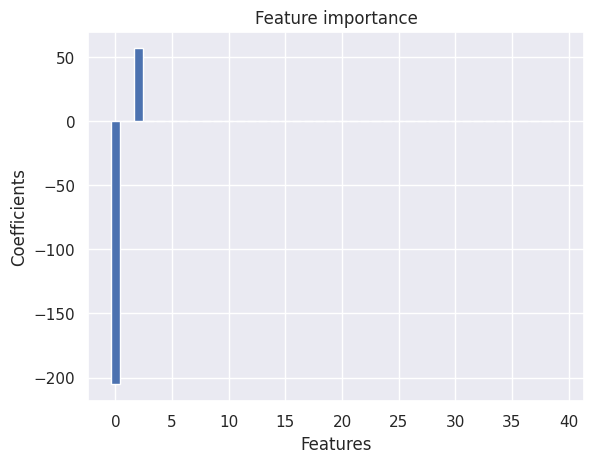

In [146]:
# 1.1 Plot logistic regression coefficients

lg_coef = lg_pipe.named_steps['classifier'].coef_
print(lg_coef)

dff = pd.DataFrame(data=lg_coef.T)
dff.columns = {'coefficients'}

plt.bar(x=dff.index, height=dff.coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature importance')
plt.show()

The first (i.e., goal) and third (i.e., backers) features yield the highest coefficients

<ipython-input-91-9d0089277192>:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



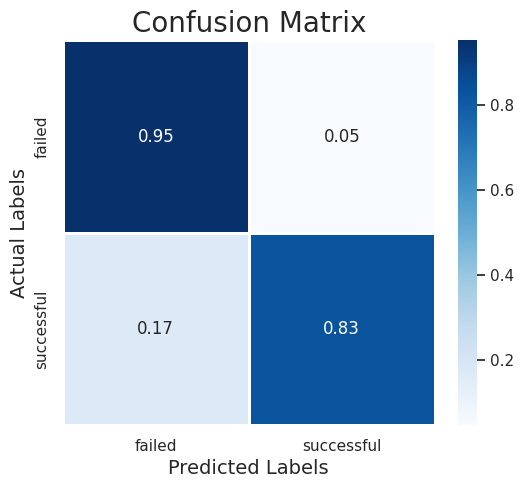

              precision    recall  f1-score   support

      failed       0.89      0.95      0.92     33398
  successful       0.92      0.83      0.87     22863

    accuracy                           0.90     56261
   macro avg       0.91      0.89      0.90     56261
weighted avg       0.90      0.90      0.90     56261



In [148]:
# Display accuracy & confusion matrix for logistic regression model

create_confusion_matrix(y_val_labels, y_pred_lg_labels, label_encoder.classes_)
print(classification_report(y_val_labels, y_pred_lg_labels))

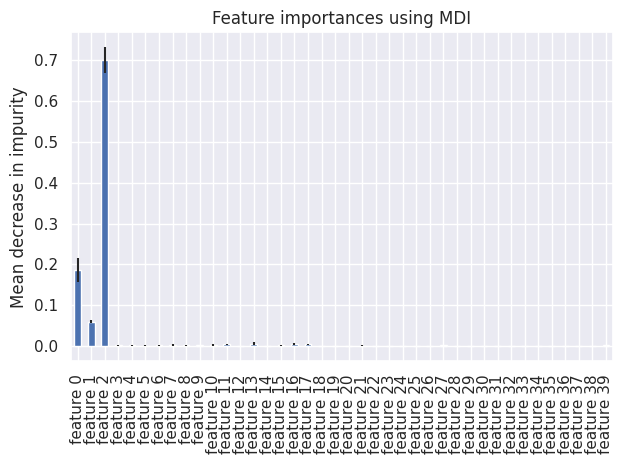

In [150]:
# 2.1 Visualize feature importance of basic RF model

importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The third feature (i.e., backers) yield the highest importance, followed by the first (i.e., goal) and second (i.e., duration)

<ipython-input-91-9d0089277192>:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



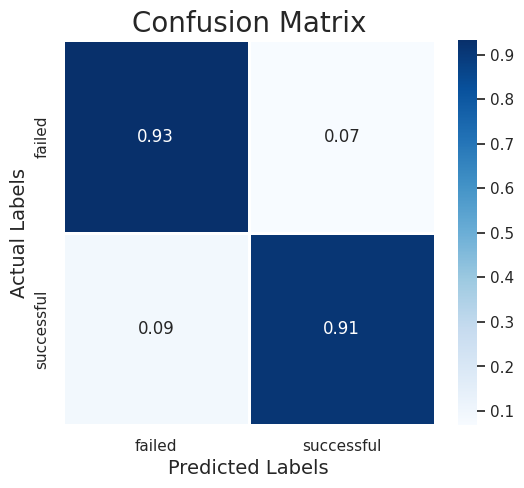

              precision    recall  f1-score   support

      failed       0.94      0.93      0.94     33398
  successful       0.90      0.91      0.91     22863

    accuracy                           0.92     56261
   macro avg       0.92      0.92      0.92     56261
weighted avg       0.92      0.92      0.92     56261



In [149]:
# 2.1 Display accuracy & confusion matrix for random forest classifier model

create_confusion_matrix(y_val_labels, y_pred_rf_labels, label_encoder.classes_)
print(classification_report(y_val_labels, y_pred_rf_labels))